### Submitted by Kumar Apurva 2K18/MC/058 and Madhuresh Mayank 2K18/MC/062

# Bollinger Band

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
df = pd.read_csv("apple.csv")
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])

## Finding Middle Band with Bperiods

In [2]:
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
    sum=0
    for j in range(0,Bperiods+1): #upto 20 periods value
        z=array_close[y]
        sum=sum+z
        y=y+1
    sum=sum/20
    array_Middleband.append(sum)
    y=y-(Bperiods)

## Finding Standard Deviation

In [3]:
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
    sum=0
    for j in range(0,Bperiods+1): #upto 20 periods value
        z=array_Middleband[x+Bperiods]
        sum=sum+((z-array_close[y])*(z-array_close[y]))
        y=y+1
    sum=sum/19
    sum=math.sqrt(sum)
    stndrd_deviation.append(sum)
    y=y-(Bperiods)

## Finding Upper and Lower Bands

In [4]:
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
    upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
    lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))

## Plotting

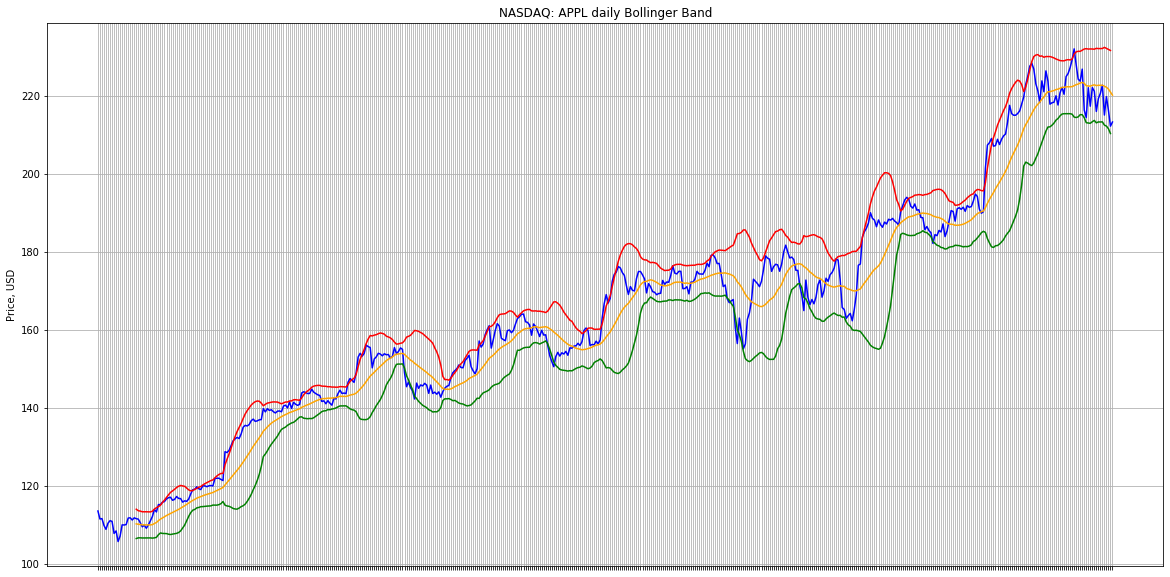

In [5]:
plt.figure(figsize=(20,10))
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
plt.xticks(x, labels, rotation = 'vertical')
plt.title("NASDAQ: APPL daily Bollinger Band")
plt.ylabel("Price, USD")
plt.grid()
frame1 = plt.gca() # hide x axis values
val1=frame1.axes.xaxis.set_ticklabels([])
plt.show()